# PROJET : Acquistion, agrégation et structuration de données

Le but de cet projet est de construire un conteneur de données qui contiendra des data sets concernant les **1000 films les mieux notés selon [IMDB](https://www.imdb.com/?ref_=nv_home) de 2000 à maintentant**.

### Extraction de données

Tout d'abord nous avons extraire les données dont vous aurez besoin pour répondre à la question posée.Ensuite combiner différentes méthodes pour extraires toutes les sources dont nous avons  besoin, comme par exemple:
- télécharger des data sets en Open Data à partir de [kaggle](https://www.kaggle.com/datasets)
- scraper la [page des 250 films les mieux notés d'IMDB](https://www.imdb.com/chart/top/?ref_=nv_mv_250)
- utiliser des API(s) existantes pour récupérer des informations manquantes 

In [135]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tables import *



- le premier travail consiste à recuperer toutes les données  que nous voudrions etudier sur le site de IMBD 
- je conserve les données qui sont utiles pour mon etude de data science pour cet exercice
- une fois j'ai listé les données que je souhaite conserver , maintenant il faut penser comment recuperer ces données
- j'ai utilisé deux methodes pour extraire toutes les données dont j'aurai besoin :
- telechargement des datasets libres à partir de kaggle pour les deux premiers dataframme 
- scrapper les autres informations pour constituer le dataframe 3 qui renvoi les informations concernant les acteurs et les realisateurs listés dans les 2 premieres datasets

###### Sur  https://www.kaggle.com/ : Nous avons telechargé les trois datasets (Un dataset avec 1000 films et 2 autres avec plus de 2000 films )

In [136]:
df1= pd.read_csv(r"Datasets/imdb_top_1000.csv" , sep=',', low_memory=False,  encoding='utf8', on_bad_lines='skip')

In [137]:
df1

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [138]:
len(df1)

1000


##### Notre exercice consiste à collecter les films à partir de 2000 donc nous allons supprimer qui contiennent les années avant 2000

In [139]:

indexNames = df1[(df1["Released_Year"] <'2000')].index
df1.drop(indexNames , inplace=True)

In [140]:
df1

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
10,https://m.media-amazon.com/images/M/MV5BN2EyZj...,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,"315,544,750"
13,https://m.media-amazon.com/images/M/MV5BZGMxZT...,The Lord of the Rings: The Two Towers,2002,UA,179 min,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,87.0,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1485555,"342,551,365"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,https://m.media-amazon.com/images/M/MV5BYjg5ZD...,Blow,2001,R,124 min,"Biography, Crime, Drama",7.6,"The story of how George Jung, along with the M...",52.0,Ted Demme,Johnny Depp,Penélope Cruz,Franka Potente,Rachel Griffiths,240714,"52,990,775"
950,https://m.media-amazon.com/images/M/MV5BYWFlY2...,Enemy at the Gates,2001,A,131 min,"Drama, History, War",7.6,A Russian and a German sniper play a game of c...,53.0,Jean-Jacques Annaud,Jude Law,Ed Harris,Joseph Fiennes,Rachel Weisz,243729,"51,401,758"
951,https://m.media-amazon.com/images/M/MV5BZTI3Yz...,Minority Report,2002,A,145 min,"Action, Crime, Mystery",7.6,In a future where a special police unit is abl...,80.0,Steven Spielberg,Tom Cruise,Colin Farrell,Samantha Morton,Max von Sydow,508417,"132,072,926"
953,https://m.media-amazon.com/images/M/MV5BZTM2ZG...,American Psycho,2000,A,101 min,"Comedy, Crime, Drama",7.6,A wealthy New York City investment banking exe...,64.0,Mary Harron,Christian Bale,Justin Theroux,Josh Lucas,Bill Sage,490062,"15,070,285"


Apres eliminations des lignes qui continant et  les années inferieures à 2000 il nous restera 486 films donc il faut aller aussi chercher d'autres films pour 
completer notre dataset1pour avoir 1000 films

In [141]:

df1.to_csv('d1_486.csv')

### Filtrage et structuration des données

##### la meme methode nous a permi d'avoir des datasets pour completer les 10192 films mais pour qui contiennent des doublons 
Maintenant nous allons filtrer nos données pour assurer qu'elles correspondent aux critères fixés dans les consignes et les structures en 3 dataframes distincts:
#### Dataframe contenant des informations spécifiques au film : 
Ce dataframe contient une colonne renseignant:
 - le titre du film
 - l'année de sa sortie en salle
 - la durée du film (runtime)
 - son genre
 - le nom de son réalisateur (director)
 - la liste des acteurs principaux
 - une description du film
 - une photo de l'affiche du film
#### Dataframe contenant des informations concernant la popularité du film : 
Ce dataframe une colonne renseignant:
 - le nombre de votes d'utilisateurs pour ce film (échelle de 1 à 10)
 - la note moyenne des votes reçus (échelle de 1 à 10)
 - les recettes du film (en millions de $) 
 - la note mediane des votes reçus (échelle de 1 à 10)
 - l'écart type des votes reçus
#### Dataframe contient des informations concernant chaque acteur et réalisateur présents dans ces films : 
Ce dataframe contient colonne renseignant:
- leur nom 
- leur pays de naissance
- leur age
- son/ses métier(s) (a choisir parmi la liste: acteur, realisateur, producteur)
- une photo

Apres avoir fusionner nos dataframes, nous allons les filtrés maintenant pour qu'elles correpondent aux structures des mes dataframes
##### Dataframe 1 :
- Suppression de toutes les colonnes qui constituent pas le dataframe 1: data1_1192.drop([''], axis=1, inplace=True)
- Renommer les colonnes : data1_1192=data.rename(columns={'': '',})

In [142]:
dframe1= pd.read_csv(r"Datasets/Dataframe1_1192.csv" , sep=',', low_memory=False,  encoding='utf8', on_bad_lines='skip')

#### Dataframe 2 :
la meme methode que le dataframe 1 (suppression des colonnes non demandées et renommer les colonnes en fonction du dataframme demandé)

In [143]:

dframe2= pd.read_csv(r"Datasets/Dataframe2_1192.csv")
dframe2

,Unnamed: 0,Titre,Notes_moyennes,Nombres_votes,Recettes_Films
0,0,Hugo,8.3,7.5,"$73,820,094"
1,2,Edge of Tomorrow,7.1,7.9,"$77,121,429"
2,3,The Jungle Book,7.7,7.5,"$363,995,937"
3,4,Inside Out,9.4,8.2,"$264,317,903"
4,5,Up,8.8,8.3,"$292,979,556"
...,...,...,...,...,...
1009,1190,"The Chronicles of Narnia: The Lion, the Witch ...",7.5,6.9,"$291,685,219"
1010,1191,Maleficent,5.6,7.0,"$190,871,149"
1011,1192,WALL·E,9.4,8.4,"$223,749,872"
1012,1193,Rush Hour 3,4.4,6.2,"$140,080,850"


#### Dataframe 3 :
#### cette partie parlera du scrapping 

Liens des sites sur lesquelles nous avons collecté les informations des acteurs et realisteurs :
- https://www.ranker.com/list/most-trustworthy-celebrities/celebrity-lists?ref=listed_on&pos=1
- https://www.ranker.com/list/hottest-male-actors-over-40/keshvaralikhani?ref=listed_on&pos=2
- https://www.ranker.com/crowdranked-list/best-actors?ref=listed_on&pos=5
- https://www.ranker.com/list/the-best-actors-working-today/bustermcdermott?ref=listed_on&pos=7
- https://www.ranker.com/crowdranked-list/best-action-stars?ref=listed_on&pos=8
- https://www.ranker.com/crowdranked-list/who-should-be-the-next-james-bond-actor?ref=listed_on&pos=10
- https://www.ranker.com/list/actor-phonebook-list/carly-kiel?ref=listed_on&pos=11
- https://www.ranker.com/list/most-handsome-male-celebrities-2020/calistylie?ref=listed_on&pos=17
- https://www.ranker.com/list/famous-men-youd-want-to-have-a-beer-with/ariel-kana?ref=listed_on&pos=19

#### la methode utilisée pour scrapper ces donnees :
- Voir le dossier Scrapping code 
- Scrape_list_famous_actors_and_actresses
- Scraper_list_actors_actresses (1)

 #### voici le dataframe trois obtenus à travers la fusion des plusieurs dataframe obtenus par la methode du scrapping 

In [144]:
dframe3= pd.read_csv(r"Datasets/dataframe_3_name_films_photo.csv")
dframe3

,Unnamed: 0,name,films,Photo
0,0,Scarlett Johansson,Lost in Translation,https://m.media-amazon.com/images/M/MV5BMTM3OT...
1,1,Henry Cavill,Man of Steel,https://m.media-amazon.com/images/M/MV5BODI0MT...
2,2,Katherine McNamara,Shadowhunters: The Mortal Instruments,https://m.media-amazon.com/images/M/MV5BMjhjOT...
3,3,Sarah Hyland,Vampire Academy,https://m.media-amazon.com/images/M/MV5BMjI0Nj...
4,4,Daisy Edgar-Jones,Normal People,https://m.media-amazon.com/images/M/MV5BZWMzNT...
...,...,...,...,...
9994,9994,Lindsay Lohan,The Parent Trap,https://m.media-amazon.com/images/M/MV5BYTU3Zm...
9995,9995,Patrick Page,In the Heights,https://m.media-amazon.com/images/M/MV5BYjI5OD...
9996,9996,Natascha McElhone,Solaris,https://m.media-amazon.com/images/M/MV5BN2Y2Yz...
9997,9997,James Marsden,Hairspray,https://m.media-amazon.com/images/M/MV5BMTQyOT...


#### Nettoyage des données : Realisation des opérations de nettoyage des données afin de rendre nos data sets le plus facilement exploitables. suivant les traitements effectués :
- vérification et traitement l'homgeneité du type de donnée dans chaque colonne
- vérification et traitement des doublons
- vérification et traitement des outliers

In [145]:
# Datframme 1 
#Nous allons supprimer les doublons et faire l'homgenité( remplacer les valeurs manquantes )
dframe1_clean= pd.read_csv(r"Datasets/Dataframe1_netoyer.csv")
dframe1_clean

,Unnamed: 0,Titre,Annee_sortie,Duree_Film,Genre,Description,Realisateur,Acteurs_principaux
0,0,The Dark Knight,2008,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger ,Aaron Eckhart ,M..."
1,1,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"Elijah Wood, Viggo Mortensen ,Ian McKellen ,Or..."
2,2,Inception,2010,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt ,Ellio..."
3,3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,"Action, Adventure, Drama",A meek Hobbit from the Shire and eight compani...,Peter Jackson,"Elijah Wood, Ian McKellen ,Orlando Bloom ,Sean..."
4,4,The Lord of the Rings: The Two Towers,2002,179 min,"Action, Adventure, Drama",While Frodo and Sam edge closer to Mordor with...,Peter Jackson,"Elijah Wood, Ian McKellen ,Viggo Mortensen ,Or..."
...,...,...,...,...,...,...,...,...
1002,1185,Star Trek Beyond,2016,122 min,"Action, Adventure, Sci-Fi",The U.S.S. Enterprise crew explores the furthe...,Justin Lin,"Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa..."
1003,1186,"The Chronicles of Narnia: The Lion, the Witch ...",2005,143 min,"Adventure, Family, Fantasy",Four kids travel through a wardrobe to the lan...,Andrew Adamson,"Georgie Henley, Skandar Keynes, William Mosele..."
1004,1187,Maleficent,2014,97 min,"Action, Adventure, Family",A vengeful fairy is driven to curse an infant ...,Robert Stromberg,"Angelina Jolie, Elle Fanning, Sharlto Copley, ..."
1005,1189,Rush Hour 3,2007,91 min,"Action, Comedy, Crime",After an attempted assassination on Ambassador...,Brett Ratner,"Chris Tucker, Jackie Chan, Max von Sydow, Hiro..."


##### Apres la suppresion des doublons le dataframe 1 est propre et contient 1007 films 
#### Dataframe 2
- Pour remplacer les valeurs manquantes :
- Trouver la  valeur de la moyenne dans une colonne 
- Utilser cette valeur pour remplir les valeurs manquantes dans cette colonnes 
- dframe2['Notes_moyennes'].median() : la moyenne etant 7.5 nous allons prendre cette valeur pour remplacer les notes moyennes manquantes 

In [146]:
#supprimer le premier caratere $ des elements de la colone recettes_films
dframe2['Notes_moyennes'].fillna(dframe2['Notes_moyennes'].mode().iloc[0], inplace=True) 


In [147]:
dframe2["Recettes_Films"].str[1:] 

0        73,820,094
1        77,121,429
2       363,995,937
3       264,317,903
4       292,979,556
           ...     
1009    291,685,219
1010    190,871,149
1011    223,749,872
1012    140,080,850
1013    126,585,313
Name: Recettes_Films, Length: 1014, dtype: object

In [148]:
dframe2["Recettes_Films"]=dframe2["Recettes_Films"].str[1:]  

- supprimer ces %^%^%^ dans les recettes_films
- %^%^%^ comme ces valeurs sont  des chaines de caractere, cela rendait impossible le calcul  de la mediane pour les recettes des films
- pour le faire ces données sont remplacées par zeros 

In [149]:
dframe2.replace('^%^%^',0,inplace=True)

- median=data2_1196["Recettes_Films"].median() la requette genère des erreurs car impossible de convertir Les colonnes string en float 
- d'apres nos calcul nous remplaceront les valeurs manquantes des recettes_films par 19 millions

In [150]:
dframe2['Recettes_Films'].fillna(19000000, inplace=True)

In [151]:
dframe2.to_csv('daframe2.csv')

#### Traitement des outliers

In [152]:
# suppressions des unitées
dframe1_clean['Duree_Film']=dframe1_clean['Duree_Film'].str.extract('(\d+)')

In [153]:
dframe1_clean['Duree_Film']=pd.to_numeric(dframe1_clean['Duree_Film'],errors = 'coerce')

In [154]:
dframe1_clean

,Unnamed: 0,Titre,Annee_sortie,Duree_Film,Genre,Description,Realisateur,Acteurs_principaux
0,0,The Dark Knight,2008,152.0,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger ,Aaron Eckhart ,M..."
1,1,The Lord of the Rings: The Return of the King,2003,201.0,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"Elijah Wood, Viggo Mortensen ,Ian McKellen ,Or..."
2,2,Inception,2010,148.0,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt ,Ellio..."
3,3,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,"Action, Adventure, Drama",A meek Hobbit from the Shire and eight compani...,Peter Jackson,"Elijah Wood, Ian McKellen ,Orlando Bloom ,Sean..."
4,4,The Lord of the Rings: The Two Towers,2002,179.0,"Action, Adventure, Drama",While Frodo and Sam edge closer to Mordor with...,Peter Jackson,"Elijah Wood, Ian McKellen ,Viggo Mortensen ,Or..."
...,...,...,...,...,...,...,...,...
1002,1185,Star Trek Beyond,2016,122.0,"Action, Adventure, Sci-Fi",The U.S.S. Enterprise crew explores the furthe...,Justin Lin,"Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa..."
1003,1186,"The Chronicles of Narnia: The Lion, the Witch ...",2005,143.0,"Adventure, Family, Fantasy",Four kids travel through a wardrobe to the lan...,Andrew Adamson,"Georgie Henley, Skandar Keynes, William Mosele..."
1004,1187,Maleficent,2014,97.0,"Action, Adventure, Family",A vengeful fairy is driven to curse an infant ...,Robert Stromberg,"Angelina Jolie, Elle Fanning, Sharlto Copley, ..."
1005,1189,Rush Hour 3,2007,91.0,"Action, Comedy, Crime",After an attempted assassination on Ambassador...,Brett Ratner,"Chris Tucker, Jackie Chan, Max von Sydow, Hiro..."


<Axes: >

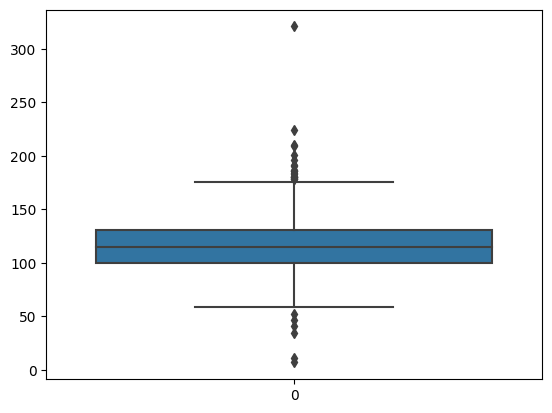

In [155]:
sns.boxplot(dframe1_clean['Duree_Film'])

Sur cet Box nous remarquons que nous avons 3 outliers, 2 dont les minutes sont inferieures à 50 minutes et une dont la minute est supérieure à 300
Pour plus d'assurance, nous avons verifier sur le site officiel d'imbd et oui les nombres de minutes corresponde parfaitement
- utilser les memes methodes que le dataframe 1 et 2 pour les données du dataframe 3

In [156]:
dframe3= pd.read_csv(r"Datasets/dataframe3.csv")

In [157]:
dframe3

,Unnamed: 0,Noms,Metiers,Image,country,age
0,0,Tom Hanks,Acteur/Actrice,https://imgix.ranker.com/user_node_img/113/225...,"Birthplace: Concord, California, USA",Born: 07-09-1956
1,7,Hugh Jackman,Acteur/Actrice,https://imgix.ranker.com/node_img/494/9865656/...,"Birthplace: Sydney, New South Wales, Australia",Born: 10-12-1968
2,10,Chris Hemsworth,Acteur/Actrice,NaN,"Birthplace: Melbourne, Australia",Born: 08-11-1983
3,12,Patrick Stewart,Acteur/Actrice,NaN,"Birthplace: Mirfield, United Kingdom",Born: 07-13-1940
4,13,Ian McKellen,Acteur/Actrice,NaN,"Birthplace: Burnley, United Kingdom",Born: 05-25-1939
...,...,...,...,...,...,...
1927,480,Alakina Mann,Acteur/Actrice,NaN,NaN,NaN
1928,481,Rachel Griffiths,Acteur/Actrice,NaN,NaN,NaN
1929,482,Rachel Weisz,Acteur/Actrice,NaN,NaN,NaN
1930,483,Max von Sydow,Acteur/Actrice,NaN,NaN,NaN


In [158]:
dframe3= dframe3.fillna(" ") # ça permettra de remplaçer toutes les NAN par des chaines de caracteres vides 

In [159]:
dframe3

,Unnamed: 0,Noms,Metiers,Image,country,age
0,0,Tom Hanks,Acteur/Actrice,https://imgix.ranker.com/user_node_img/113/225...,"Birthplace: Concord, California, USA",Born: 07-09-1956
1,7,Hugh Jackman,Acteur/Actrice,https://imgix.ranker.com/node_img/494/9865656/...,"Birthplace: Sydney, New South Wales, Australia",Born: 10-12-1968
2,10,Chris Hemsworth,Acteur/Actrice,,"Birthplace: Melbourne, Australia",Born: 08-11-1983
3,12,Patrick Stewart,Acteur/Actrice,,"Birthplace: Mirfield, United Kingdom",Born: 07-13-1940
4,13,Ian McKellen,Acteur/Actrice,,"Birthplace: Burnley, United Kingdom",Born: 05-25-1939
...,...,...,...,...,...,...
1927,480,Alakina Mann,Acteur/Actrice,,,
1928,481,Rachel Griffiths,Acteur/Actrice,,,
1929,482,Rachel Weisz,Acteur/Actrice,,,
1930,483,Max von Sydow,Acteur/Actrice,,,


In [160]:
# j'ai separer le dataframe 3 en deux dataframe :
 # 1er data contient les images 
 # 2eme contient les nom ,le metier ,pays de naissance et l'age des acteurs et realisateurs 

In [161]:
dframe3_image= pd.read_csv(r"Datasets/dataframe_images.csv")
dframe3_autres_types_donnees= pd.read_csv(r"Datasets/dataframe3_autres_types_donnees.csv")

In [162]:
dframe3_image

,Unnamed: 0,Image
0,0,https://imgix.ranker.com/user_node_img/113/225...
1,7,https://imgix.ranker.com/node_img/494/9865656/...
2,10,
3,12,
4,13,
...,...,...
1927,480,
1928,481,
1929,482,
1930,483,


In [163]:
dframe3_autres_types_donnees

,Unnamed: 0,Noms,Metiers,country,age
0,0,Tom Hanks,Acteur/Actrice,"Birthplace: Concord, California, USA",Born: 07-09-1956
1,7,Hugh Jackman,Acteur/Actrice,"Birthplace: Sydney, New South Wales, Australia",Born: 10-12-1968
2,10,Chris Hemsworth,Acteur/Actrice,"Birthplace: Melbourne, Australia",Born: 08-11-1983
3,12,Patrick Stewart,Acteur/Actrice,"Birthplace: Mirfield, United Kingdom",Born: 07-13-1940
4,13,Ian McKellen,Acteur/Actrice,"Birthplace: Burnley, United Kingdom",Born: 05-25-1939
...,...,...,...,...,...
1927,480,Alakina Mann,Acteur/Actrice,,
1928,481,Rachel Griffiths,Acteur/Actrice,,
1929,482,Rachel Weisz,Acteur/Actrice,,
1930,483,Max von Sydow,Acteur/Actrice,,


### Agrégation et structuration des données
Maitenant que nos données sont nettoyées, nous allons maintenant les structurez et les stocker dans un **conteneur de données au format HDF5**. 
- un groupe contenant les images que vous allez acquérir
- un groupe pour tous les autres types de données
- Nous allons faire nos groupes  
    - 1 : le groupe du dataframes 1
    - 2 : le groupe du dataframes 2
    - 3 : le groupe des images 
    - 4 : le groupe qui contient le nom,le pays de naissance, ainsi les metiers 

In [164]:
store_films = pd.HDFStore("store.h5") # on cree un store vide 
store_films # affichage du store

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5

In [165]:
store_films.groups()

[]

In [166]:
store_films.close()

### Exploitation de vos données

A partir de votre conteneur HDF5 nous allons extraire, filtrer et agréger nos données pour répondre aux questions suivantes:
- Quelle est la durée médiane des films ?
- Quels sont les notes moyennes des films par genre ?
- Faites un graphique pour représenter la répartition des durées des films
- Quels sont les caractéristiques des acteurs et réalisateurs ayant participé aux 5% des films les mieux notés ? 

In [167]:
#Pour la durée mediane  du film nous allons utiliser le groupe 1 
median=dframe1_clean["Duree_Film"].median()
median

115.0

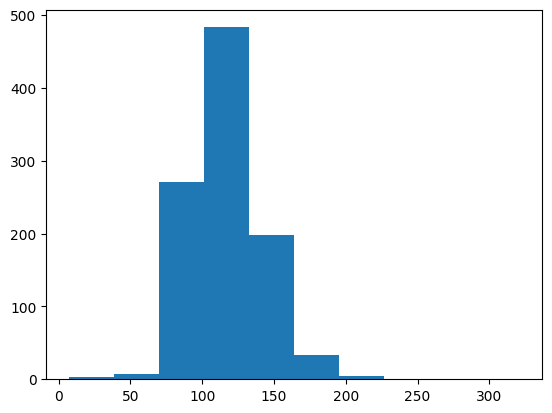

In [168]:
#un graphique pour représenter la répartition des durées des films 
plt.hist(dframe1_clean['Duree_Film'], 10)
plt.show()

In [169]:
#les notes moyennes des films par genre
df2= pd.read_csv(r"C:\Users\Windows10\Desktop\exercice_classe/daframe2.csv")
df2

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Windows10\\Desktop\\exercice_classe/daframe2.csv'

In [ ]:
#Dataframme avec le genre et la note 
frame=[d1["Genre"],df2["Notes_moyennes"]]
df4=pd.concat(frame)
df4.head()

In [ ]:
d1.head(10)

In [ ]:
df2["Notes_moyennes"]

In [ ]:
df1

In [ ]:
 # les caractéristiques des acteurs et réalisateurs ayant participé aux 5% des films les mieux notés ? (2 points)
 # pour repondre à cete questions nous allons utilser le dataframe 2
df2= pd.read_csv(r"C:\Users\Windows10\Desktop\exercice_classe/daframe2.csv")

In [ ]:
df2

In [ ]:
#j'affiche les films les mieux notés 
# je fais le tri des meilleurs films qui sont au dessus de la moyenne et afficher 5 % de ces films 
print(df2.sort_values(by=['Notes_moyennes']))

In [ ]:
d2=df2.nlargest(50, 'Notes_moyennes')

In [ ]:
print(d2.shape)